<a href="https://colab.research.google.com/github/DrStephPowers/BIA/blob/main/Ch8_SocialNetwork_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
classX = pd.read_excel("/content/drive/MyDrive/Datasets/class.xlsx")

In [7]:
classX.head()

,Source,Target
0,Stephanie,John
1,John,Maria
2,Stephanie,Maria
3,Stephanie,Tiffany
4,Tiffany,Mario


In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [35]:
net = nx.from_pandas_edgelist(classX, source='Source', target='Target')

In [36]:
pos = nx.spring_layout(net, iterations=20, k=4)

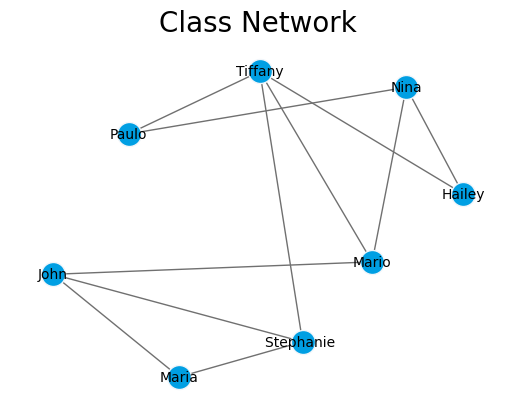

In [38]:
plt.axis('off')
plt.title('Class Network',fontsize = 20)

for node in net.nodes():
    ns = nx.draw_networkx_nodes(net, pos, nodelist=[node], node_color='#009fe3')
    ns.set_edgecolor('#f2f6fa')

nx.draw_networkx_labels(net, pos, font_size=10);

nx.draw_networkx_edges(net, pos, edge_color='#707070')
plt.show()

In [55]:
def independent_cascade(G,t,infection_times):
    current_infectious = [n for n in infection_times if infection_times[n]==t]
    for n in current_infectious:
        for v in G.neighbors(n):
            if v not in infection_times:
                if  3 >= np.random.randint(11): #probability of spread (change 3 to a number between 1 and 9)
                    infection_times[v] = t+1
    return infection_times

In [56]:
def plot_G(G,pos,infection_times,t):
    current_infectious = [n for n in infection_times if infection_times[n]==t]
    plt.figure()
    plt.axis('off')
    plt.title('Class Network, t={}'.format(t),fontsize = 24)

    for node in G.nodes():
        if node in current_infectious:
            ns = nx.draw_networkx_nodes(G,pos, nodelist=[node], node_color='#feba02')
        elif infection_times.get(node,9999999)<t:
            ns = nx.draw_networkx_nodes(G,pos, nodelist=[node], node_color='#ff0000')
        else:
            ns = nx.draw_networkx_nodes(G,pos, nodelist=[node], node_color='#009fe3')
        ns.set_edgecolor('#f2f6fa')

    nx.draw_networkx_labels(G,pos,font_size=10);

    nx.draw_networkx_edges(G,pos,edge_color='#707070')

In [57]:
infection_times = {'Stephanie':-1,'Maria':0} #change initial spread

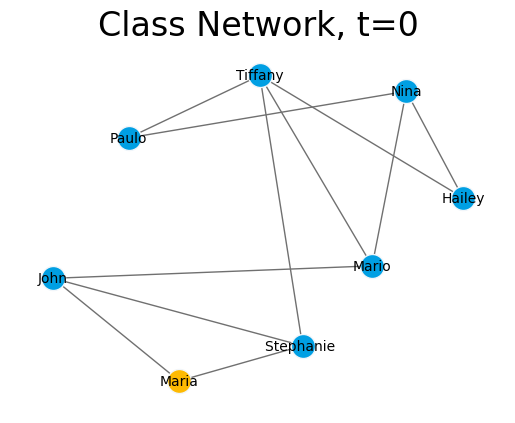

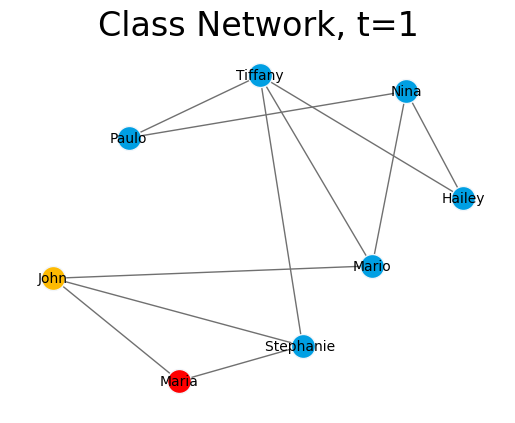

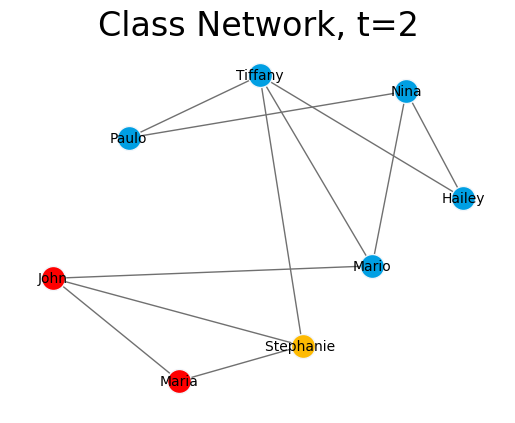

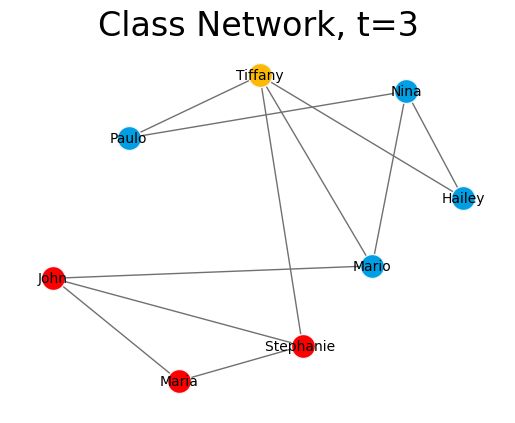

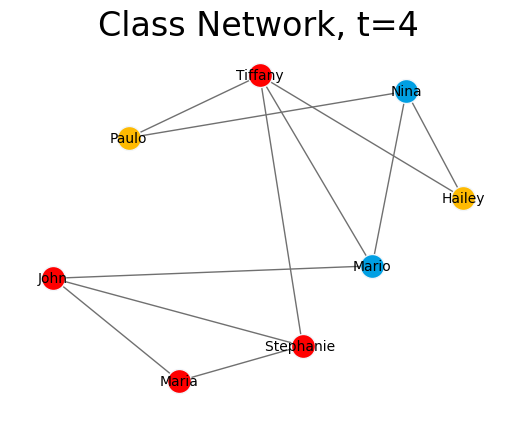

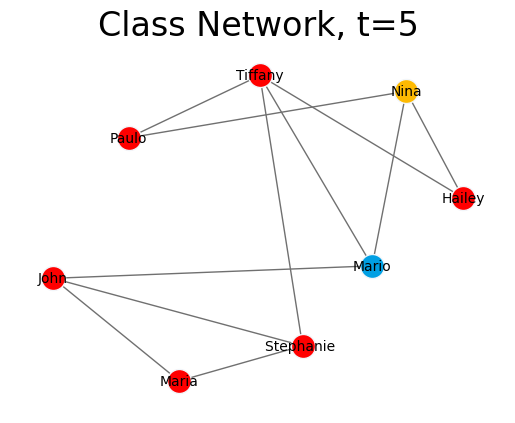

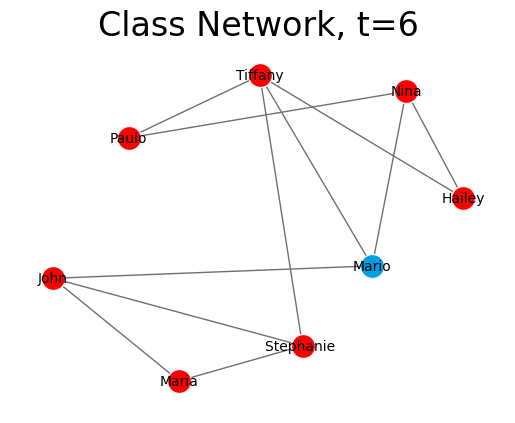

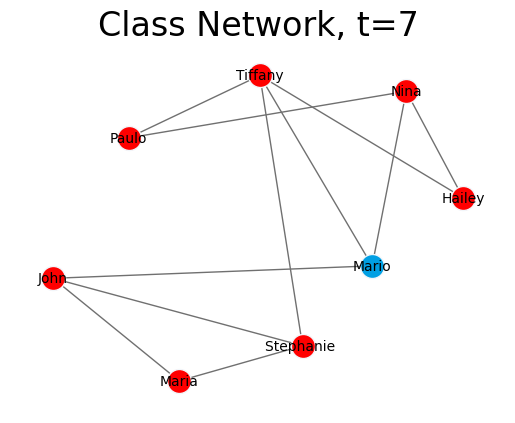

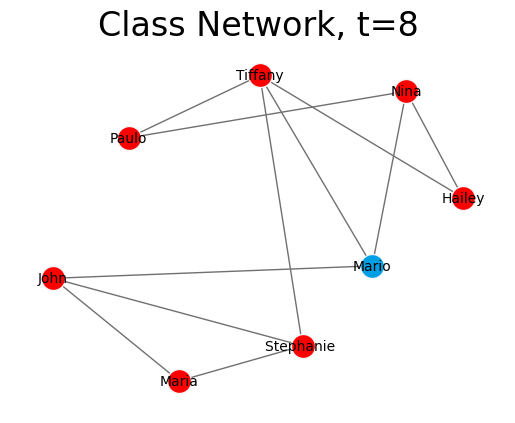

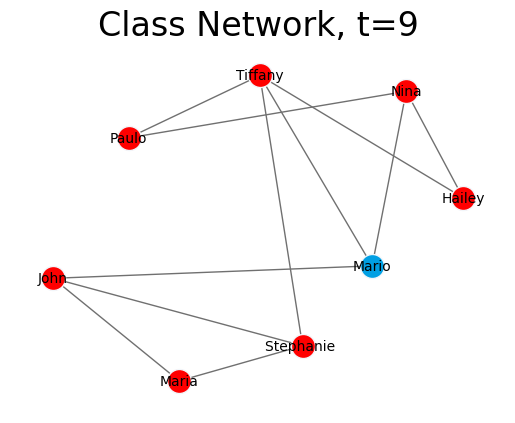

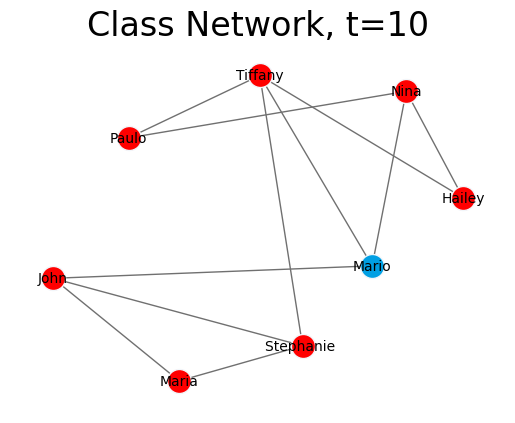

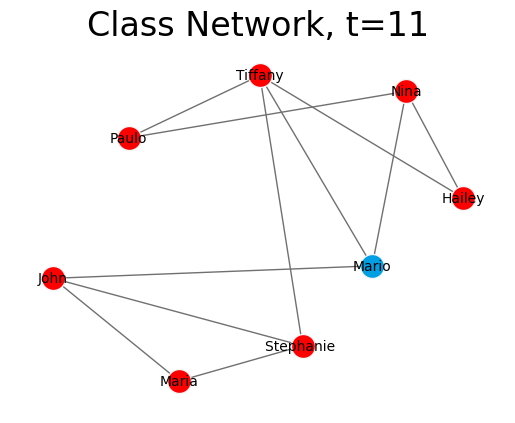

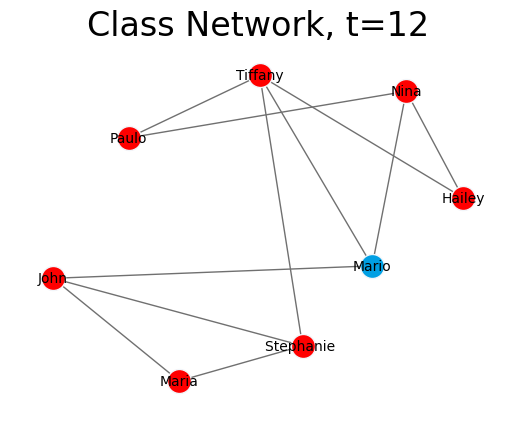

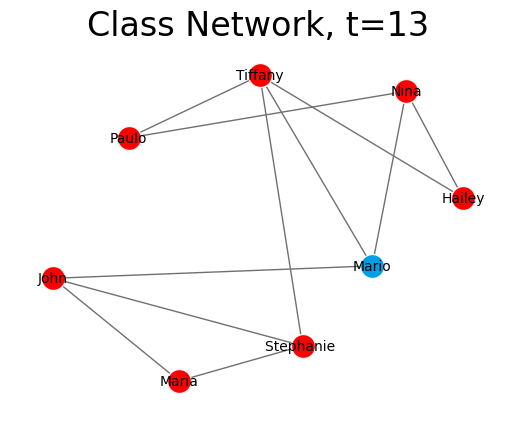

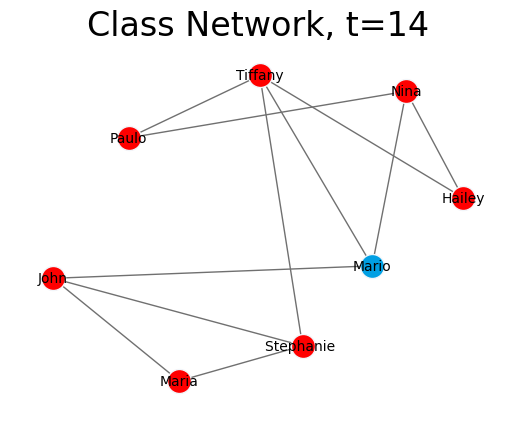

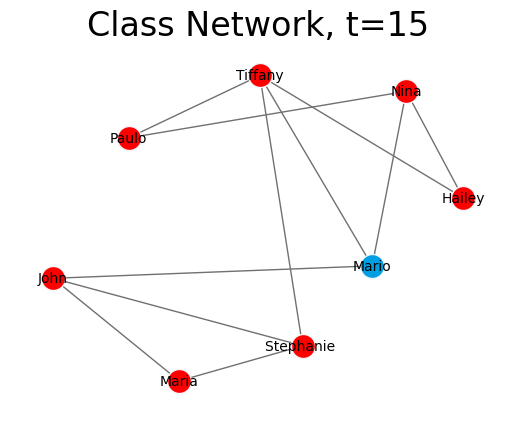

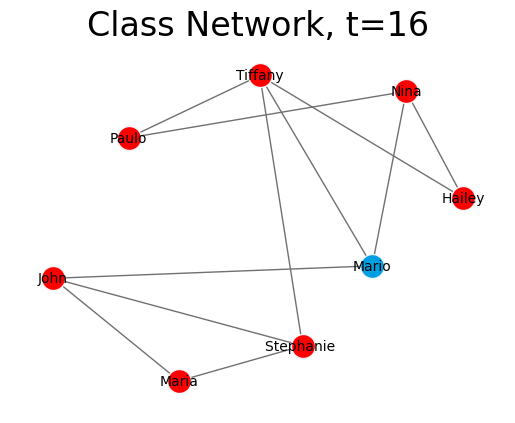

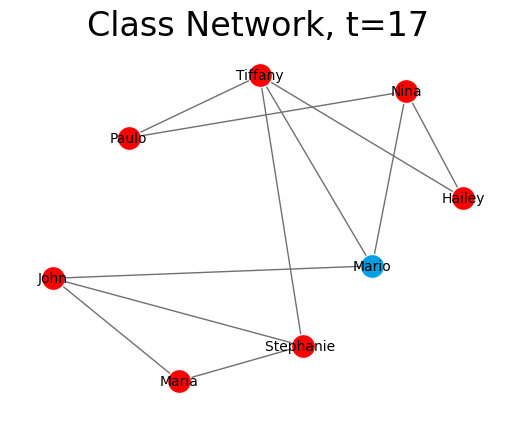

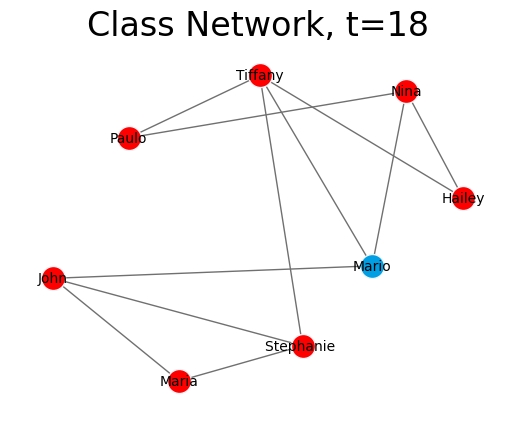

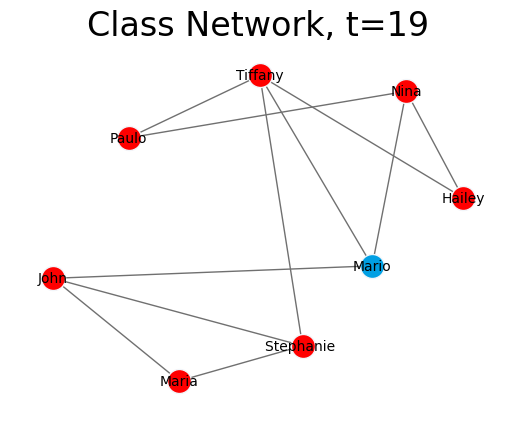

In [59]:
for t in range(20): #change number of periods
    plot_G(net, pos, infection_times, t)
    infection_times = independent_cascade(net, t, infection_times)